# MNIST DIGIT CLASSIFICATION USING DEEP LEARNING

To activate venv

.venv\Scripts\activate 

to deactivate

deactivate


In [2]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import cv2
from PIL import Image

In [3]:

import tensorflow as tf
tf.random.set_seed(3)

from tensorflow import keras
from keras.datasets import mnist

from tensorflow.math import confusion_matrix

In [4]:
# loading mnist data
(X_train,Y_train),(X_test,Y_test)=mnist.load_data()

In [5]:
type(X_train)

numpy.ndarray

In [6]:
# shape of numpy arrays
(X_train.shape,Y_train.shape,X_test.shape,Y_test.shape)


((60000, 28, 28), (60000,), (10000, 28, 28), (10000,))

images are grayscale

image dim- 28*28

In [7]:
# printing the 10th image

print(X_train[9])

[[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0 189 190   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0 143 247 153   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0 136 247 242  86   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0 192 252 187   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0  62 185  18   

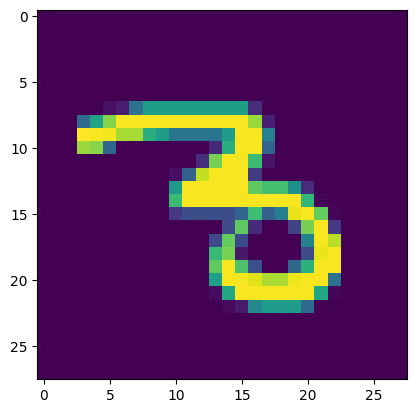

3


In [8]:
img= plt.imshow(X_train[30])
plt.show()
# print corresponding label
print(Y_train[30])

In [9]:
# unique values in Y_train

np.unique(Y_train)

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9], dtype=uint8)

In [10]:

np.unique(Y_test)

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9], dtype=uint8)

We can use this variables as such or apply One hot encoding

In [11]:
# scaling the values

X_train= X_train/255
X_test=X_test/255

0/255 = 0

255/255 = 1

All the values will now range between 0 and 1


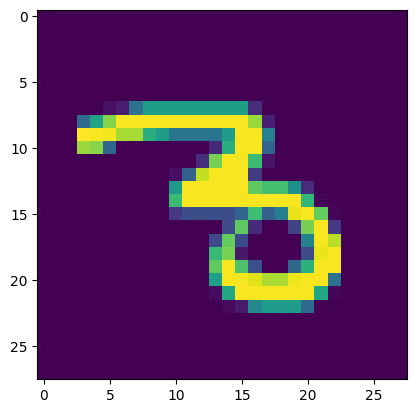

3


In [12]:
img= plt.imshow(X_train[30])
plt.show()
# print corresponding label
print(Y_train[30])

In [13]:
print(X_train[10])

[[0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.    

# Building a Neural Network

Using RNN

In [14]:
# setting up the layers for the Neural Network

model= keras.Sequential([
    keras.layers.Flatten(input_shape=(28,28)), # makes data into a single list
    keras.layers.Dense(50,activation='relu'), # 50 is no of neurons in one layer
    keras.layers.Dense(50,activation='relu'), # 50 is no of neurons in one layer
    keras.layers.Dense(10,activation='sigmoid'), # 10 represents the number of classes in the output layer
])

In [15]:
# COmpliling the model

model.compile(optimizer="adam", 
              loss="sparse_categorical_crossentropy", # simple label inputs
              metrics=['accuracy'] 
              )

In [16]:
# Training our Model

model.fit(X_train,Y_train,epochs=10)

Epoch 1/10
1875/1875 [==============================] - 7s 2ms/step - loss: 0.3034 - accuracy: 0.9107
Epoch 2/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.1411 - accuracy: 0.9579
Epoch 3/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.1052 - accuracy: 0.9681
Epoch 4/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0853 - accuracy: 0.9738
Epoch 5/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0720 - accuracy: 0.9782
Epoch 6/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0609 - accuracy: 0.9809
Epoch 7/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.0538 - accuracy: 0.9824
Epoch 8/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0467 - accuracy: 0.9854
Epoch 9/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.0395 - accuracy: 0.9875
Epoch 10/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.036

Training Data Accuracy - 98.76%

Loss - 0.0365

In [17]:
# Accuracy on test data

loss, accuracy = model.evaluate(X_test,Y_test)

313/313 [==============================] - 1s 2ms/step - loss: 0.0990 - accuracy: 0.9739


In [18]:
print(loss, accuracy)

0.09904731065034866 0.9739000201225281


Accuracy - 97.39%

Model doesn't overfit

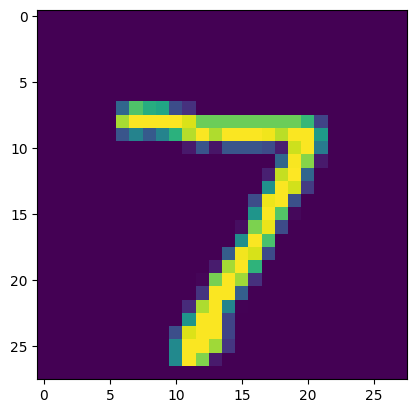

7


In [19]:
plt.imshow(X_test[0])
plt.show()
print(Y_test[0])


In [20]:

# Predicting the output
yhat = model.predict(X_test)

313/313 [==============================] - 1s 2ms/step


In [21]:
yhat.shape

(10000, 10)

In [22]:
print(yhat[0])

[7.4346340e-04 2.1034931e-03 2.9829016e-01 6.3302338e-01 4.2391082e-05
 1.2341054e-03 4.0552445e-07 9.9999440e-01 3.0637642e-02 3.7630394e-01]


model.predict() gives prediction probability for each class for that datapoint

In [23]:
# converting the prediction probabilities to class labels

label_first= np.argmax(yhat[0])
label_first

7

In [24]:
# converting the prediction probabilities to class labels for all datapoints

y_pred_label= [np.argmax(i) for i in yhat]
print(y_pred_label)


[7, 2, 1, 0, 4, 1, 4, 9, 5, 9, 0, 6, 9, 0, 1, 5, 9, 7, 3, 4, 9, 6, 6, 5, 4, 0, 7, 4, 0, 1, 3, 1, 3, 4, 7, 2, 7, 1, 2, 1, 1, 7, 4, 2, 3, 5, 1, 2, 4, 4, 6, 3, 5, 5, 6, 0, 4, 1, 9, 5, 7, 8, 9, 3, 7, 4, 6, 4, 3, 0, 7, 0, 2, 9, 1, 7, 3, 2, 9, 7, 7, 6, 2, 7, 8, 4, 7, 3, 6, 1, 3, 6, 9, 3, 1, 4, 1, 7, 6, 9, 6, 0, 5, 4, 5, 9, 2, 1, 9, 4, 8, 7, 3, 9, 7, 9, 4, 4, 9, 2, 5, 4, 7, 6, 7, 9, 0, 5, 8, 5, 6, 6, 5, 7, 8, 1, 0, 1, 6, 4, 6, 7, 3, 1, 7, 1, 8, 2, 0, 9, 9, 8, 5, 5, 1, 5, 6, 0, 3, 4, 4, 6, 5, 4, 6, 5, 4, 5, 1, 4, 4, 7, 2, 3, 2, 7, 1, 8, 1, 8, 1, 8, 5, 0, 8, 9, 2, 5, 0, 1, 1, 1, 0, 9, 0, 3, 1, 6, 4, 2, 3, 6, 1, 1, 1, 3, 9, 5, 2, 9, 4, 5, 9, 3, 9, 0, 3, 6, 5, 5, 7, 2, 2, 7, 1, 2, 8, 4, 1, 7, 3, 3, 8, 8, 7, 9, 2, 2, 4, 1, 5, 9, 8, 7, 2, 3, 0, 2, 4, 2, 4, 1, 9, 5, 7, 7, 2, 8, 2, 0, 8, 5, 7, 7, 9, 1, 8, 1, 8, 0, 3, 0, 1, 9, 9, 4, 1, 8, 2, 1, 2, 9, 7, 5, 9, 2, 6, 4, 1, 5, 8, 2, 9, 2, 0, 4, 0, 0, 2, 8, 4, 7, 1, 2, 4, 0, 2, 7, 4, 3, 3, 0, 0, 3, 1, 9, 6, 5, 2, 5, 9, 7, 9, 3, 0, 4, 2, 0, 7, 1, 1, 2, 1, 

Y_test - true labels

y_pred_labels - predicted labels

In [25]:
# confusion matrix

conf_mat= confusion_matrix(Y_test,y_pred_label)

In [26]:
conf_mat

<tf.Tensor: shape=(10, 10), dtype=int32, numpy=
array([[ 969,    0,    3,    2,    0,    2,    0,    1,    2,    1],
       [   0, 1123,    2,    1,    0,    2,    4,    0,    3,    0],
       [   5,    4,  995,    6,    3,    1,    1,    4,   11,    2],
       [   0,    0,    3,  990,    0,    5,    0,    6,    6,    0],
       [   2,    0,    2,    1,  959,    1,    4,    3,    1,    9],
       [   2,    0,    0,   10,    1,  868,    2,    0,    4,    5],
       [   5,    2,    0,    1,    5,    9,  929,    1,    6,    0],
       [   1,    6,    8,    4,    1,    0,    0,  997,    6,    5],
       [   2,    0,    2,   12,    2,   16,    1,    4,  932,    3],
       [   1,    5,    0,    3,   11,    5,    0,    5,    2,  977]])>

Text(0.5, 47.7222222222222, 'Predicted Label')

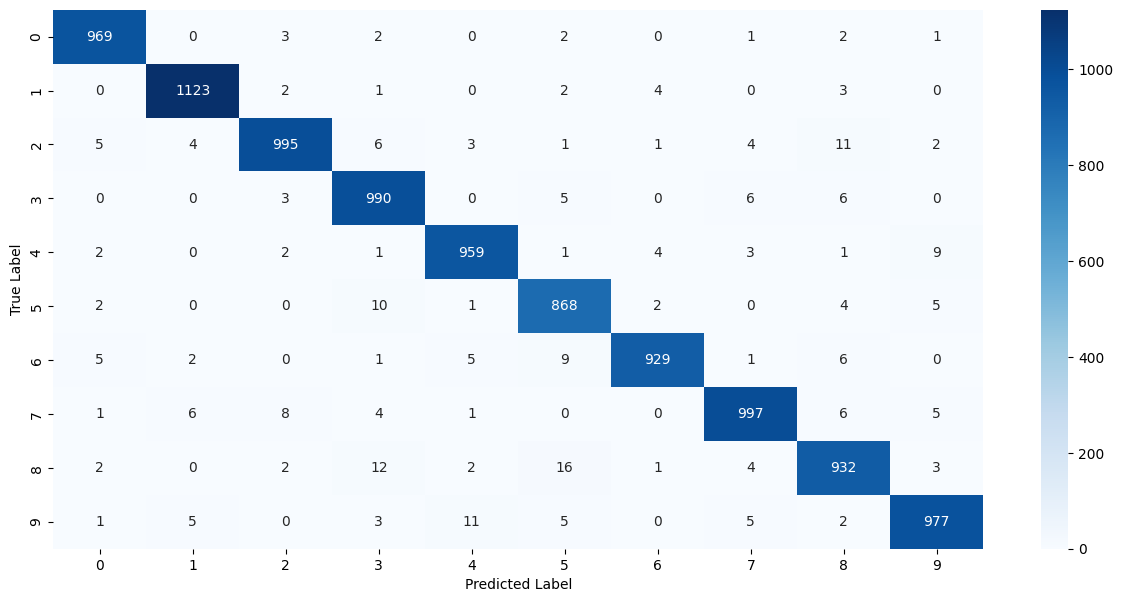

In [27]:
plt.figure(figsize=(15,7))
sns.heatmap(conf_mat,annot=True,fmt='d',cmap="Blues")
plt.ylabel('True Label')
plt.xlabel('Predicted Label')

In [28]:
i=128
k=X_test[i]*255 
# Save the image to a file
cv2.imwrite("digit.png", k)
print(Y_test[i])

8


In [41]:
model.save("model.keras")

# building predictive system

In [44]:
predictive_model = keras.models.load_model("model.keras")

In [29]:
img=[] # array of img

# reading the image


for i in range(10):
    img.append(cv2.imread(f"Data/digit{i}.png"))

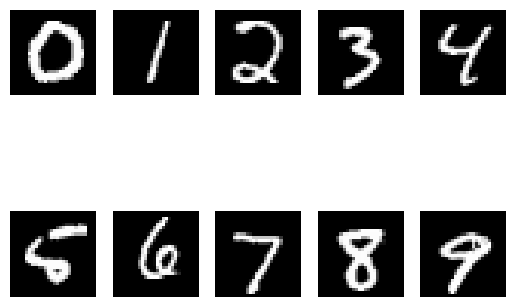

In [30]:
# plot all the img list

for i in range(10):
    plt.subplot(2,5,i+1)
    plt.imshow(img[i])
    plt.axis("off")
plt.show()

In [34]:
# convert img to numpy array
img= np.array(img)

In [37]:
print(len(img))
print(img.shape)

10
(10, 28, 28, 3)


Cv2 read the images as RGB images

In [38]:
# convert from rgb to grayscale

img_gray= np.array([cv2.cvtColor(i,cv2.COLOR_BGR2GRAY) for i in img])

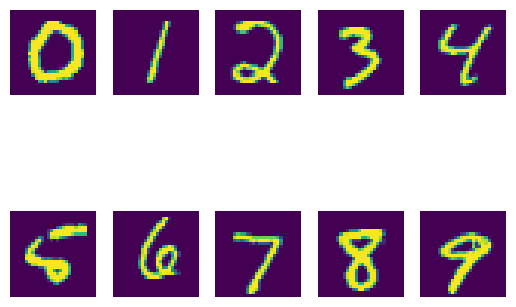

In [39]:
# plot all the img list

for i in range(10):
    plt.subplot(2,5,i+1)
    plt.imshow(img_gray[i])
    plt.axis("off")
plt.show()

In [46]:
img_gray[0]

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,  86, 254,
        254, 254, 254, 135,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,  90, 250, 253,
        253, 253, 253, 252, 248, 160, 118,  45,   0,   0,   0,   0,   0,
          0,   0],
       [  

In [47]:
# scaling

img_gray=img_gray/255

In [50]:
pred= predictive_model.predict(img_gray)

1/1 [==============================] - 0s 26ms/step


In [51]:
pred_label= [np.argmax(i) for i in pred]

In [52]:
pred_label

[0, 1, 2, 3, 4, 5, 6, 7, 8, 9]

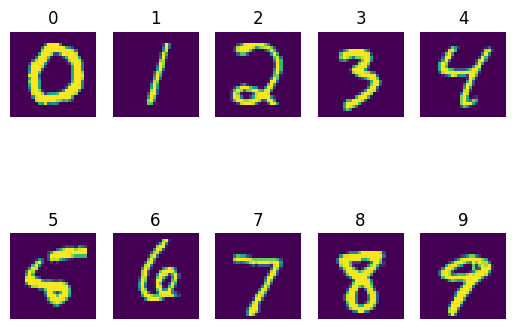

In [53]:
# Show img_gray and pred_label together

for i in range(10):
    plt.subplot(2,5,i+1)
    plt.imshow(img_gray[i])
    plt.title(pred_label[i])
    plt.axis("off")
plt.show()

In [54]:
# predicting for one img

p= np.reshape(img_gray[0],[1,28,28]) # giving only one datapoint for prediction

In [55]:
p.shape

(1, 28, 28)

In [56]:
pred=predictive_model.predict(p)

1/1 [==============================] - 0s 156ms/step


array([[1.0000000e+00, 3.0254191e-06, 6.8061417e-01, 3.8769504e-05,
        7.9965732e-09, 3.8909472e-03, 9.7430009e-01, 7.5089496e-01,
        2.2658579e-02, 3.9626715e-01]], dtype=float32)

In [59]:
ans=np.argmax(pred)
ans

0

Model has evaluated correctly